In [8]:
with open('input.txt', 'r') as file:
    data = file.read()
    data = data.splitlines()
    data = [tuple(int(x) for x in line.split(",")) for line in data] # split into (x,y) tuples

## Part 1

In [9]:
from itertools import combinations
def area_between(p1, p2):
    return (abs(p1[0]-p2[0])+1) * (abs(p1[1]-p2[1])+1)

areas = []
for p1, p2 in combinations(data, 2):
    area = area_between(p1, p2)
    rect = p1, p2, (p1[0], p2[1]), (p2[0], p1[1])
    areas.append((area, *rect))
max_area = max(areas)
print(max_area)

(4750297200, (83903, 85123), (15099, 16084), (83903, 16084), (15099, 85123))


## Part 2

KeyboardInterrupt: 

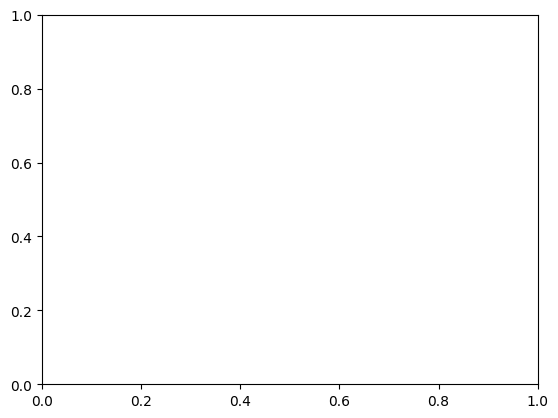

In [10]:

import matplotlib.pyplot as plt

limits = []
num_lines = 0
for comb in combinations(data, 2):
    p1, p2 = comb

    if p1[0] != p2[0] and p1[1] != p2[1]:
        continue
    new_points = set()
    num_lines += 1
    for x in range(min(p1[0], p2[0]), max(p1[0], p2[0]) + 1):
        for y in range(min(p1[1], p2[1]), max(p1[1], p2[1]) + 1):
            new_points.add((x,y))
    limits.extend(new_points)
limits = list(set(limits))
x, y = zip(*limits)
dx, dy = zip(*data)
#plt.scatter(dx, dy, color='red', marker='x', s=10)
plt.scatter(x, y, color='green', s=1)
plt.legend(['Green tiles'], loc='upper right')
plt.show()



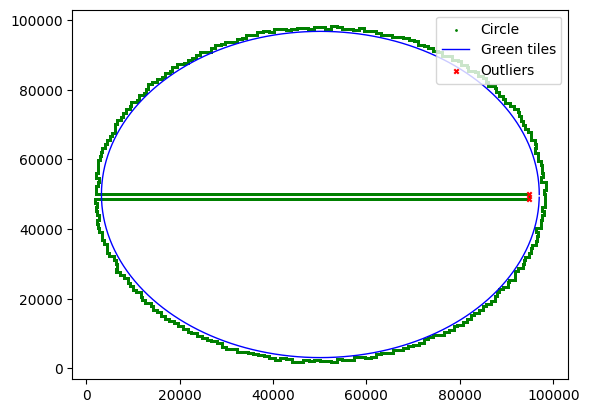

In [ ]:
from math import sin, cos, pi
radius = max(abs(max(x)-min(x)), abs(max(y)-min(y)))/2-1400 # magic circle radius s.t. all points except the two "outliers" are outside of the circle:D
center = ((max(x)+min(x))/2, (max(y)+min(y))/2)
circle_points = []
for angle in range(0, 360, 1):
    rad = angle * (pi / 180)
    cx = center[0] + radius * 1.0 *  (cos(rad))
    cy = center[1] + radius * 1.0 *  (sin(rad))
    circle_points.append((cx, cy))

fig, ax = plt.subplots()
plt.scatter(x, y, color='green', s=1)
cx, cy = zip(*circle_points)
plt.plot(cx, cy, color='blue', linewidth=1)
plt.legend(['Circle', 'Green tiles'], loc='upper right')

outliers = []
for point in data:
    # check if point is within the circle
    if ((point[0]-center[0])**2 + (point[1]-center[1])**2) <= radius**2:
        outliers.append(point)

ox, oy = zip(*outliers)
plt.scatter(ox, oy, color='red', marker='x', s=10)
plt.legend(['Circle', 'Green tiles', 'Outliers'], loc='upper right')
plt.show()


YRJISTÄ TÄLLE

Found valid area: 1578115935 at index 48325
(1578115935, (5606, 67703), (94870, 50025), (5606, 50025), (94870, 67703))


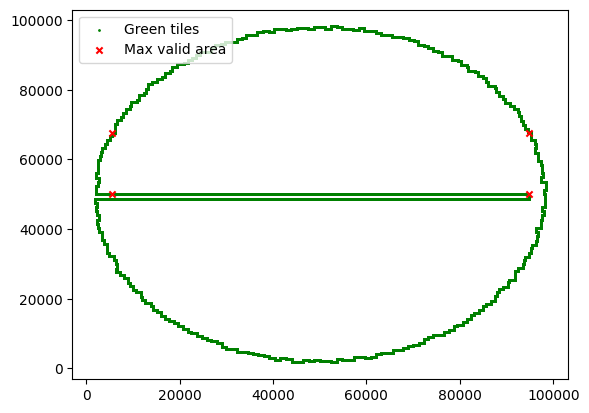

In [15]:
outlier_ranges = ((min(outliers, key=lambda p: p[0])[0], max(outliers, key=lambda p: p[0])[0]),
                  (min(outliers, key=lambda p: p[1])[1], max(outliers, key=lambda p: p[1])[1]))
outliers_x = [p for p in range(outlier_ranges[0][0]+1, outlier_ranges[0][1])]
outliers_y = [p for p in range(outlier_ranges[1][0]+1, outlier_ranges[1][1])]

max_valid_area = None

areas = sorted(areas, reverse=True)
for i, (area, p1, p2, p3, p4) in enumerate(areas):
    rect = set([p1, p2, p3, p4])
    min_x = min(rect, key=lambda p: p[0])[0]
    max_x = max(rect, key=lambda p: p[0])[0]
    min_y = min(rect, key=lambda p: p[1])[1]
    max_y = max(rect, key=lambda p: p[1])[1]
    valid = True
    for ox in outliers_x:
        if min_x < ox < max_x:
            valid = False
            break
    for oy in outliers_y:
        if min_y < oy < max_y:
            valid = False
            break
    
    #Check if any corner is not in limits, i.e. inside the green area "circle"
    for corner in rect:
        # calculate distance from center
        dist = (corner[0]-center[0])**2 + (corner[1]-center[1])**2
        if dist >= (radius+1400)**2:
            valid = False
            break
    print(f"Area {i}/{len(areas)}", end='\r')
    if not valid:
        continue
    print(f"Found valid area: {area} at index {i}")
    max_valid_area = (area, p1, p2, p3, p4)
    break
    
print(max_valid_area)

fig, ax = plt.subplots()
vx, vy = zip(*(max_valid_area[1:5]))

plt.scatter(x, y, color='green', s=1)
plt.scatter(vx, vy, color='red', marker='x', s=20)
plt.legend(["Green tiles", "Max valid area"], loc='upper left')
plt.show()
    